<a href="https://colab.research.google.com/github/sharedlabs1/100-pandas-puzzles/blob/master/Copy_of_pysparkincollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,696 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main al

In [ ]:
spark

WHat is RDD?

Resilient: Fault tolerant :can recover lost partitions

Distributed: Data is split and processed across multiple nodes

Immutable:Once Created ,it can not be modified, transformations will return new RDD

Lazy Evaluation:transformations are executed only when action is called

In [ ]:
rdd=spark.sparkContext.parallelize([1,2,3,4,5])
rdd.collect()

[1, 2, 3, 4, 5]

**Transformation : return new RDD **

Transformation functions: map(),filter(),flatmap(),distict(),union()

**RDD Actions: retunrs result **

Action functions:collect(),count(),first(),take(5),saveAsTextFile()


In [ ]:
data=[1,2,3,4,5]
rdd=spark.sparkContext.parallelize(data)
rdd2=rdd.map(lambda x: x*2)
rdd2.collect()



[2, 4, 6, 8, 10]

In [ ]:
data=[1,2,3,4,5]
rdd=spark.sparkContext.parallelize(data)
rdd2=rdd.filter(lambda x: x%2==0)
rdd2.collect()

[2, 4]

In [ ]:
words=["spark","big","data","platform","ml","ai"]

rdd=spark.sparkContext.parallelize(words)

long_words=rdd.filter(lambda x: len(x)>4)

long_words.collect()



['spark', 'platform']

In [ ]:
rdd1=spark.sparkContext.parallelize([1,2,3,4,5])
rdd2=spark.sparkContext.parallelize([4,5,6,7,8])
rdd3=rdd1.intersection(rdd2)
rdd3.collect()

[4, 5]

#joins : join tables using a common key
#joins :  join rrds using a common key

In [ ]:
rdd1=spark.sparkContext.parallelize([("a",1),("b",2),("c",3)])
rdd2=spark.sparkContext.parallelize([("a","sales"),("b","account")])
#inner join
rdd3=rdd1.join(rdd2)
rdd3.collect()

#leftouter join

left_join=rdd1.leftOuterJoin(rdd2)
left_join.collect()

#rightouter join

right_join=rdd1.rightOuterJoin(rdd2)
right_join.collect()



[('b', (2, 'account')), ('a', (1, 'sales'))]

Partitions:

Parallel

Scalability

Performance

In [ ]:
print(rdd1.getNumPartitions())

2


In [ ]:
rdd1_p=rdd1.repartition(4)
print(rdd1_p.getNumPartitions())

4


In [ ]:
rdd1_p_r=rdd1_p.coalesce(2)
print(rdd1_p_r.getNumPartitions())

2


Paired RDD:

contains elements in key-value pair

Joins

Group

aggregate

Sorting

In [ ]:
# prompt: create data which is list of  employees in various department
data= [("sales","emp1"),("sales","emp2"),("sales","emp3"),("hr","emp4"),("hr","emp5"),("hr","emp6")]

pairedrdd1=spark.sparkContext.parallelize(data)
pairedrdd1.collect()

grouped=pairedrdd1.groupByKey().mapValues(list)
grouped.collect()



[('sales', ['emp1', 'emp2', 'emp3']), ('hr', ['emp4', 'emp5', 'emp6'])]

''

In [ ]:
rdd=spark.sparkContext.parallelize([1,2,3,4,5])
rdd2=rdd.filter(lambda x: x%2==0) # transformation
rdd2.collect() # action

[2, 4]

In [ ]:
rdd1=spark.sparkContext.parallelize([1,2,3,4,5])
rdd2=spark.sparkContext.parallelize([4,5,6,7,8])
rdd3=rdd1.union(rdd2)
rdd3.collect()


[1, 2, 3, 4, 5, 4, 5, 6, 7, 8]

In [ ]:
rdd1=spark.sparkContext.parallelize([1,2,3,4,5])
rdd2=rdd1.map(lambda x: x*2)
rdd2.collect()

[2, 4, 6, 8, 10]

In [ ]:
rdd1=spark.sparkContext.parallelize([(1,"aaaa"),(2,"bbbb"),(1,"cccc")])
rdd2=rdd1.groupByKey()
rdd2.collect()
print([(k,list(v)) for k,v in rdd2.collect()])


[(2, ['bbbb']), (1, ['aaaa', 'cccc'])]


In [ ]:
!ls -l


total 4
drwxr-xr-x 1 root root 4096 Feb  3 14:20 sample_data


In [ ]:
spark

In [ ]:
from pyspark.sql.functions import col ,to_date
import pyspark.sql.functions as F

In [ ]:
dataset=[
    ("2023-01-01",100.0),
    ("2023-01-02",125.5),
    ("2023-01-03",1115.0),
    ("2023-01-04",100.0),
    ("2023-01-05",102.0),
    ("2023-01-06",104.5),
    ]

In [ ]:
columns=["Date","StockPrice"]
dft=spark.createDataFrame(dataset,columns)
dft.show()

+----------+----------+
|      Date|StockPrice|
+----------+----------+
|2023-01-01|     100.0|
|2023-01-02|     125.5|
|2023-01-03|    1115.0|
|2023-01-04|     100.0|
|2023-01-05|     102.0|
|2023-01-06|     104.5|
+----------+----------+



In [ ]:
!mkdir testdir

In [ ]:
dft.write.csv("/testdir/sampledata.csv")

In [ ]:
!cd /testdir/

In [ ]:
!ls /testdir/

sampledata.csv


In [ ]:
numofpartitions=dft.rdd.getNumPartitions()
print(numofpartitions)

2


In [ ]:
df_repartitioned=dft.repartition(10)

In [ ]:
print(df_repartitioned.rdd.getNumPartitions())

10


In [ ]:
df_repartitioned=dft.coalesce(4)
print(df_repartitioned.rdd.getNumPartitions())

2


In [ ]:
#calculate a moving average of the stockprice over a 4 days window
from pyspark.sql.window import Window
DFT=dft.withColumn("MovingAvg",F.avg("StockPrice").over(Window.orderBy("Date").rowsBetween(-3,0)))


DFT.show()

+----------+----------+-----------------+
|      Date|StockPrice|        MovingAvg|
+----------+----------+-----------------+
|2023-01-01|     100.0|            100.0|
|2023-01-02|     125.5|           112.75|
|2023-01-03|    1115.0|446.8333333333333|
|2023-01-04|     100.0|          360.125|
|2023-01-05|     102.0|          360.625|
|2023-01-06|     104.5|          355.375|
+----------+----------+-----------------+



In [ ]:
seasonal_data=[
    ("2023-01-01","Sunday",500),
    ("2023-01-02","Monday",300),
    ("2023-01-03","Tuesday",320) ,
    ("2023-01-04","Wednesday",310),
    ("2023-01-05","Thrusday",330) ,
    ("2023-01-06","Friday",600),
    ("2023-01-07","Saturday",700),


]

In [ ]:
seasonal_columns=["Date","DayOfWeek","Sales"]
df=spark.createDataFrame(seasonal_data,seasonal_columns)
df.show()

+----------+---------+-----+
|      Date|DayOfWeek|Sales|
+----------+---------+-----+
|2023-01-01|   Sunday|  500|
|2023-01-02|   Monday|  300|
|2023-01-03|  Tuesday|  320|
|2023-01-04|Wednesday|  310|
|2023-01-05| Thrusday|  330|
|2023-01-06|   Friday|  600|
|2023-01-07| Saturday|  700|
+----------+---------+-----+



In [ ]:
df.repartition("year","month")

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `year` cannot be resolved. Did you mean one of the following? [`Date`, `Sales`, `DayOfWeek`].;
'RepartitionByExpression ['year, 'month]
+- LogicalRDD [Date#43, DayOfWeek#44, Sales#45L], false


In [ ]:
def upper_case(str):
  return str.capitalize() if str else None

In [ ]:
upper_name_udf=F.udf(upper_case,T.StringType())

In [ ]:
data10=[("john",25),("jane",30),("bob",40)]

In [ ]:
udfdata=spark.createDataFrame(data10,["Name","Age"])

In [ ]:
df_upper_names=udfdata.withColumn("Name",upper_name_udf(col("Name")))

In [ ]:
df_upper_names.show()

+----+---+
|Name|Age|
+----+---+
|John| 25|
|Jane| 30|
| Bob| 40|
+----+---+



In [ ]:
df.groupBy("DayOfWeek").agg(F.avg("Sales").alias("TotalSales")).show()

+---------+----------+
|DayOfWeek|TotalSales|
+---------+----------+
|  Tuesday|     320.0|
|   Monday|     300.0|
|   Sunday|     500.0|
|Wednesday|     310.0|
|   Friday|     600.0|
| Saturday|     700.0|
| Thrusday|     330.0|
+---------+----------+



In [ ]:
import random
import pandas as pd
def generate_customer_data(num_records):
    data = []
    for i in range(num_records):
        customer_id = f"CUST_{random.randint(1, 100)}"
        order_amount = round(random.uniform(-100, 10000), 2)  # Some outliers and negative values
        order_date = pd.Timestamp.now()
        data.append((customer_id, order_amount, order_date))

        # Introduce duplicates
        if random.random() < 0.1:
            data.append((customer_id, order_amount, order_date))

    df = pd.DataFrame(data, columns=["customer_id", "order_amount", "order_date"])
    df.to_csv("customer_transactions.csv", index=False)

generate_customer_data(1000)

In [ ]:
transaction_df = spark.read.csv("/content/customer_transactions.csv", header=True, inferSchema=True)
transaction_df.show(5)

+-----------+------------+--------------------+
|customer_id|order_amount|          order_date|
+-----------+------------+--------------------+
|     CUST_9|     7093.88|2024-10-22 19:04:...|
|    CUST_23|     8684.94|2024-10-22 19:04:...|
|    CUST_39|     6860.83|2024-10-22 19:04:...|
|    CUST_39|     6860.83|2024-10-22 19:04:...|
|    CUST_74|      9668.9|2024-10-22 19:04:...|
+-----------+------------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, mean, stddev, count
import random
import pandas as pd

In [ ]:
duplicate_records = transaction_df.groupBy("customer_id", "order_amount", "order_date").count().filter(col("count") > 1)
duplicate_records.show()

+-----------+------------+--------------------+-----+
|customer_id|order_amount|          order_date|count|
+-----------+------------+--------------------+-----+
|    CUST_10|     7704.54|2024-10-22 19:04:...|    2|
|     CUST_6|      496.99|2024-10-22 19:04:...|    2|
|    CUST_13|      8430.1|2024-10-22 19:04:...|    2|
|    CUST_72|     6169.04|2024-10-22 19:04:...|    2|
|    CUST_58|     2682.49|2024-10-22 19:04:...|    2|
|    CUST_15|     3683.59|2024-10-22 19:04:...|    2|
|    CUST_66|     3488.26|2024-10-22 19:04:...|    2|
|    CUST_92|     5856.94|2024-10-22 19:04:...|    2|
|    CUST_69|     2517.31|2024-10-22 19:04:...|    2|
|    CUST_53|     7731.28|2024-10-22 19:04:...|    2|
|     CUST_5|     7521.57|2024-10-22 19:04:...|    2|
|    CUST_27|     8524.63|2024-10-22 19:04:...|    2|
|     CUST_8|     9756.26|2024-10-22 19:04:...|    2|
|    CUST_39|     6860.83|2024-10-22 19:04:...|    2|
|    CUST_61|     3159.78|2024-10-22 19:04:...|    2|
|    CUST_93|     8396.82|20

In [ ]:
rdd = spark.sparkContext.parallelize([1,2,3,4,5])
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
sc=spark.sparkContext



In [ ]:

data = [1, 2, 3, 4, 5]
rdd2 = sc.parallelize(data)
print(rdd2.collect())

[1, 2, 3, 4, 5]


In [ ]:
data1 = [("a", 1), ("b", 1), ("a", 1), ("b", 1), ("a", 1)]
data2 = [("a", 2), ("b", 2), ("a", 2), ("b", 2), ("a", 2)]
rdd1 = sc.parallelize(data1)
rdd2 = sc.parallelize(data2)
rdd_join = rdd1.join(rdd2)
print(rdd_join.collect())


[('b', (1, 2)), ('b', (1, 2)), ('b', (1, 2)), ('b', (1, 2)), ('a', (1, 2)), ('a', (1, 2)), ('a', (1, 2)), ('a', (1, 2)), ('a', (1, 2)), ('a', (1, 2)), ('a', (1, 2)), ('a', (1, 2)), ('a', (1, 2))]


In [ ]:
!pip install pyspark faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.7 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import random

fake = Faker()

# Generate synthetic healthcare claims data for 1000 claims

claims_data = [(i, fake.uuid4(), fake.uuid4(), random.uniform(100, 1000), fake.date_this_year()) for i in range(1000)]
for claim in claims_data[:5]:  # Preview the first 5 rows
    print(claim)

(0, '49aa384a-d57b-4db7-8be3-9008e6505bd5', 'c710ce0a-805d-4989-a8da-bffab0fe955b', 697.3793658897195, datetime.date(2024, 2, 24))
(1, '35bafc65-236c-440f-aa70-afff605947e7', '2fe9764d-33e3-494e-98fb-e0775a4cf618', 183.12649203661658, datetime.date(2024, 1, 6))
(2, 'c414d09c-8e63-4961-88c6-eb76d63b62e5', '883bf2b4-4dfb-4e9f-903b-2eb5f02b2a67', 849.729343772666, datetime.date(2024, 8, 6))
(3, '6949a30b-a1dd-47f5-b3de-93f7332f851f', '7faa921b-5aa1-4210-a142-2f3edc134042', 830.3353266296738, datetime.date(2024, 2, 9))
(4, '687de738-e26d-4e97-b9b9-d8337788d7b3', 'c6bb9cad-1321-4c54-babf-c4adc48a1641', 186.8624853394632, datetime.date(2024, 2, 6))


In [ ]:
# Create an RDD from claims data
claims_rdd = sc.parallelize(claims_data)
claims_rdd.take(5)  # Preview first 5 rows of the RDD

[(0,
  '49aa384a-d57b-4db7-8be3-9008e6505bd5',
  'c710ce0a-805d-4989-a8da-bffab0fe955b',
  697.3793658897195,
  datetime.date(2024, 2, 24)),
 (1,
  '35bafc65-236c-440f-aa70-afff605947e7',
  '2fe9764d-33e3-494e-98fb-e0775a4cf618',
  183.12649203661658,
  datetime.date(2024, 1, 6)),
 (2,
  'c414d09c-8e63-4961-88c6-eb76d63b62e5',
  '883bf2b4-4dfb-4e9f-903b-2eb5f02b2a67',
  849.729343772666,
  datetime.date(2024, 8, 6)),
 (3,
  '6949a30b-a1dd-47f5-b3de-93f7332f851f',
  '7faa921b-5aa1-4210-a142-2f3edc134042',
  830.3353266296738,
  datetime.date(2024, 2, 9)),
 (4,
  '687de738-e26d-4e97-b9b9-d8337788d7b3',
  'c6bb9cad-1321-4c54-babf-c4adc48a1641',
  186.8624853394632,
  datetime.date(2024, 2, 6))]

In [ ]:
# Filter claims with claim_amount > 500
high_value_claims_rdd = claims_rdd.filter(lambda x: x[3] > 500)
high_value_claims_rdd.take(5)  # Preview high-value claims

[(0,
  '49aa384a-d57b-4db7-8be3-9008e6505bd5',
  'c710ce0a-805d-4989-a8da-bffab0fe955b',
  697.3793658897195,
  datetime.date(2024, 2, 24)),
 (2,
  'c414d09c-8e63-4961-88c6-eb76d63b62e5',
  '883bf2b4-4dfb-4e9f-903b-2eb5f02b2a67',
  849.729343772666,
  datetime.date(2024, 8, 6)),
 (3,
  '6949a30b-a1dd-47f5-b3de-93f7332f851f',
  '7faa921b-5aa1-4210-a142-2f3edc134042',
  830.3353266296738,
  datetime.date(2024, 2, 9)),
 (5,
  '30a911f4-20ef-4050-b171-e08398c7c9b9',
  'a74bb6f6-f41a-4b66-9936-18574081319d',
  889.9702445483689,
  datetime.date(2024, 9, 2)),
 (8,
  '9e412651-6065-4023-bc36-230ebea57392',
  '9990a918-cfde-43c1-910f-1f38be9bf322',
  551.5068029994274,
  datetime.date(2024, 6, 14))]

In [ ]:
# Calculate total claim amount
total_claim_amount = claims_rdd.map(lambda x: x[3]).reduce(lambda a, b: a + b)
print(f"Total Claim Amount: ${total_claim_amount}")

Total Claim Amount: $571884.5146364479


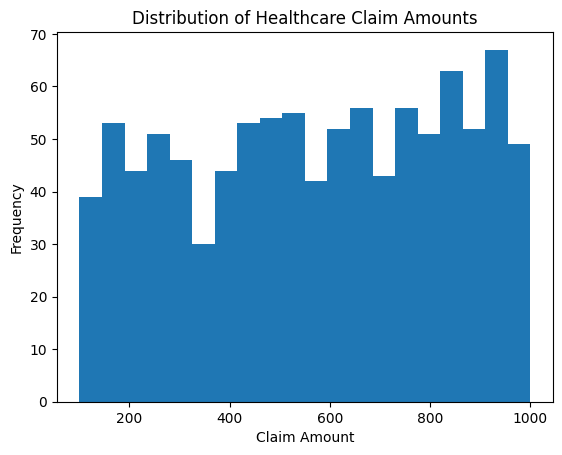

In [ ]:
import matplotlib.pyplot as plt

# Extract claim amounts for visualization

claim_amounts = claims_rdd.map(lambda x: x[3]).collect()

# Plot histogram of claim amounts

plt.hist(claim_amounts, bins=20)
plt.title("Distribution of Healthcare Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from pyspark import SparkContext

In [ ]:
sc

<SparkContext master=local[*] appName=Our First Spark Example>

In [ ]:
sales_data=[(1,101,1001,2,50,"2024-10-01"),(2,102,1002,1,20,"2024-10-02"),(3,103,1003,2,20,"2024-10-03")]

In [ ]:
sales_data

[(1, 101, 1001, 2, 50, '2024-10-01'),
 (2, 102, 1002, 1, 20, '2024-10-02'),
 (3, 103, 1003, 2, 20, '2024-10-03')]

In [ ]:
sales_rdd=sc.parallelize(sales_data)

In [ ]:
from datetime import datetime

In [ ]:
def filter_sales_data(sale):
  sales_date=datetime.strptime(sale[5],"%Y-%m-%d")
  return  sales_date.year > datetime.strptime("2024-10-02","%Y-%m-%d").year

filtered_sales_rdd=sales_rdd.filter(filter_sales_data)


In [ ]:
sales_rdd.collect()

[(1, 101, 1001, 2, 50, '2024-10-01'),
 (2, 102, 1002, 1, 20, '2024-10-02'),
 (3, 103, 1003, 2, 20, '2024-10-03')]

In [ ]:
sales_rdd.count()

3

In [ ]:
sales_rdd.take(2)

In [ ]:
sales_rdd.saveAsTextFile("sales_data.txt")

In [ ]:
from pyspark.sql.functions import sum
data=[("North","ProductA",100),("North","ProductB",200),("South","ProductB",200),("South","ProductB",200)]

In [ ]:
columns=["Region","Product","Sales"]
df=spark.createDataFrame(data,columns)
df.show()

+------+--------+-----+
|Region| Product|Sales|
+------+--------+-----+
| North|ProductA|  100|
| North|ProductB|  200|
| South|ProductB|  200|
| South|ProductB|  200|
+------+--------+-----+



In [ ]:
pdf=df.groupBy("Region").pivot("Product").agg(sum("Sales").alias("TotalSales"))
pdf.show()

+------+--------+--------+
|Region|ProductA|ProductB|
+------+--------+--------+
| South|    NULL|     400|
| North|     100|     200|
+------+--------+--------+



In [ ]:
mdf=pdf.select

In [ ]:
from pyspark.sql.functions import expr

In [ ]:
mdf=pdf.select("Region",expr("stack('ProductA','ProductB') as (Product,Product,Sales)")).filter("Sales is not null")

AnalysisException: [UDTF_ALIAS_NUMBER_MISMATCH] The number of aliases supplied in the AS clause does not match the number of columns output by the UDTF. Expected 2 aliases, but got Product,Product,Sales. Please ensure that the number of aliases provided matches the number of columns output by the UDTF.

In [ ]:
mdf.show()

+------+--------+--------+
|Region| Product|   Sales|
+------+--------+--------+
| North|ProductA|ProductB|
| South|ProductA|ProductB|
+------+--------+--------+



In [ ]:
spark

In [ ]:
from pyspark.sql import Row
data= [Row(Exp=1, hours=35,project=2,salary=20000), Row(Exp=3,hours=45,project=4,salary=40000),
      Row(Exp=5,hours=50,project=5,salary=60000),Row(Exp=7,hours=60,project=5,salary=80000),
       Row(Exp=10,hours=70,project=5,salary=100000)]
df = spark.createDataFrame(data)
df.show()

+---+-----+-------+------+
|Exp|hours|project|salary|
+---+-----+-------+------+
|  1|   35|      2| 20000|
|  3|   45|      4| 40000|
|  5|   50|      5| 60000|
|  7|   60|      5| 80000|
| 10|   70|      5|100000|
+---+-----+-------+------+



In [ ]:
#Spark ML needs features in a single vector columns
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=["Exp","hours","project"],outputCol="features")
df_transformed=assembler.transform(df)
df_transformed.show()

+---+-----+-------+------+---------------+
|Exp|hours|project|salary|       features|
+---+-----+-------+------+---------------+
|  1|   35|      2| 20000| [1.0,35.0,2.0]|
|  3|   45|      4| 40000| [3.0,45.0,4.0]|
|  5|   50|      5| 60000| [5.0,50.0,5.0]|
|  7|   60|      5| 80000| [7.0,60.0,5.0]|
| 10|   70|      5|100000|[10.0,70.0,5.0]|
+---+-----+-------+------+---------------+



In [ ]:
df_final=df_transformed.select("features","salary")
df_final.show()

+---------------+------+
|       features|salary|
+---------------+------+
| [1.0,35.0,2.0]| 20000|
| [3.0,45.0,4.0]| 40000|
| [5.0,50.0,5.0]| 60000|
| [7.0,60.0,5.0]| 80000|
|[10.0,70.0,5.0]|100000|
+---------------+------+



In [ ]:
# select split ratio

In [ ]:
train_df,tst_df=df_final.randomSplit([0.8,0.2],seed=42)

In [ ]:
train_df.show()

+---------------+------+
|       features|salary|
+---------------+------+
| [1.0,35.0,2.0]| 20000|
| [3.0,45.0,4.0]| 40000|
| [7.0,60.0,5.0]| 80000|
|[10.0,70.0,5.0]|100000|
+---------------+------+



In [ ]:
tst_df.show()

+--------------+------+
|      features|salary|
+--------------+------+
|[5.0,50.0,5.0]| 60000|
+--------------+------+



In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

lrm=LinearRegression(featuresCol="features",labelCol="salary")
lrm_model=lrm.fit(train_df)

In [ ]:
print(lrm_model.coefficients)
print(lrm_model.intercept)

[3730.653733135238,1280.8038800594304,1198.6601999009247]
-31622.776601683792


In [ ]:
predictions=lrm_model.transform(tst_df)
predictions.show()

+--------------+------+-----------------+
|      features|salary|       prediction|
+--------------+------+-----------------+
|[5.0,50.0,5.0]| 60000|57063.98706646855|
+--------------+------+-----------------+



In [ ]:
#MAE R2 Score

evaluator=RegressionEvaluator(labelCol="salary",predictionCol="prediction",metricName="mae")
mae=evaluator.evaluate(predictions)


-inf


In [ ]:
evaluator2=RegressionEvaluator(labelCol="salary",predictionCol="prediction",metricName="r2")
r2score=evaluator2.evaluate(predictions)
print(r2score)

-inf


In [ ]:
evaluator3=RegressionEvaluator(labelCol="salary",predictionCol="prediction",metricName="rmse")
rmse=evaluator3.evaluate(predictions)
print(rmse)

2936.0129335314487


In [ ]:
lrm_model.save("lrm_model")